In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
mean_1 = [0, 0]
cov_1 = [[0.1, 0], [0, 0.1]]

mean_2 = [3,1.5]
cov_2 =[[0.2,0],[0,0.1]]

mean_3 = [2,-0.5]
cov_3 = [[0.1,0],[0,0.1]]

In [103]:
#x_1,y_1 = np.random.multivariate_normal(mean_1, cov_1, 10).T
#x_2,y_2 = np.random.multivariate_normal(mean_2, cov_2, 12).T
#x_3,y_3 = np.random.multivariate_normal(mean_3, cov_3, 9).T
#p_1 = np.vstack((x_1,y_1)).T
#p_2 = np.vstack((x_2,y_2)).T
#p_3 = np.vstack((x_3,y_3)).T
#points = np.vstack((p_1,p_2,p_3))
#np.savetxt("pres/points_3cluster.csv", points, delimiter=",")
with open("pres/points_3cluster.csv", newline='') as my_csv:
    points = pd.read_csv(my_csv, sep=',', header=None).values
    
x_1_,y_1_ = points[0:10,:].T
x_2_,y_2_ = points[10:22,:].T
x_3_,y_3_ = points[22:31,:].T


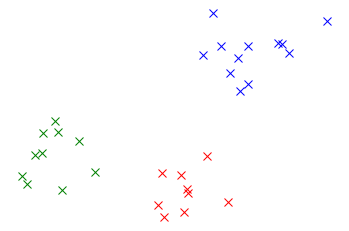

In [104]:
fig = plt.figure()
plt.plot(x_1_, y_1_, 'x', color='green', markersize='8')
plt.plot(x_2_, y_2_, 'x', color='blue',markersize='8')
plt.plot(x_3_, y_3_, 'x', color='red',markersize='8')
plt.axis('equal')
plt.axis('off')
fig.savefig('pres/points_colored.pdf',bbox_inches="tight")

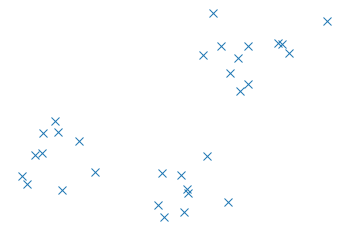

In [132]:
fig2 = plt.figure()
plt.plot(points[:,0], points[:,1], 'x', markersize='8')
plt.axis('equal')
plt.axis('off')
fig2.savefig('pres/points_no_colored.pdf',bbox_inches="tight")

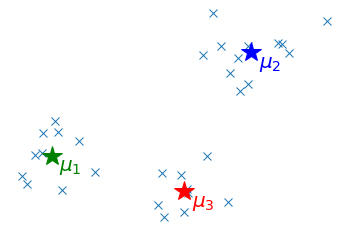

In [133]:
fig3 = plt.figure()
plt.plot(points[:,0], points[:,1], 'x', markersize='8')
plt.axis('equal')
plt.axis('off')
plt.plot(np.mean(x_1_),np.mean(y_1_), '*', markersize='20', color='green')
plt.text(np.mean(x_1_)  + 0.1, np.mean(y_1_) - 0.2 , '$\\mu_1$', fontsize=20, color='green')
plt.plot(np.mean(x_2_),np.mean(y_2_), '*', markersize='20', color='blue')
plt.text(np.mean(x_2_)  + 0.1, np.mean(y_2_) - 0.2 , '$\\mu_2$', fontsize=20, color='blue')
plt.plot(np.mean(x_3_),np.mean(y_3_), '*', markersize='20', color='red')
plt.text(np.mean(x_3_)  + 0.1, np.mean(y_3_) - 0.2 , '$\\mu_3$', fontsize=20, color='red')

fig3.savefig('pres/points_and_means.pdf',bbox_inches="tight")


In [168]:
#u_1 = np.random.normal(2, 0.3, 8)
#u_2 = np.random.normal(3.5, 0.3, 10)
#u_3 = np.random.normal(6, 0.6, 12)
#u_p = np.concatenate((u_1,u_2,u_3))
#np.savetxt("pres/univariate_points.csv", u_p, delimiter=",")
with open("pres/univariate_points.csv", newline='') as my_csv:
    u_p = pd.read_csv(my_csv, sep=',', header=None).values

u_1 = u_p[0:8]
u_2 = u_p[8:18]
u_3 = u_p[18:30]

array([2.20439639, 1.71367008, 1.68390725, 1.75432863, 1.72282044,
       2.26546811, 1.86900734, 2.19217228, 3.17018222, 3.59186248,
       3.40754083, 3.33119044, 3.10710239, 3.56361374, 3.48786002,
       3.21100324, 4.00305972, 3.44904746, 6.19879596, 6.61638151,
       6.27681708, 6.8288014 , 5.76404381, 6.48885843, 6.3717168 ,
       6.46155944, 5.02119719, 5.5493323 , 5.77725595, 6.27422793])

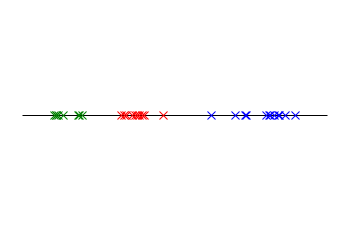

In [363]:
fig4 = plt.figure(figsize=(6,4))
plt.plot(u_1, np.zeros_like(u_1), 'x', markersize=8, color='green')
plt.plot(u_2, np.zeros_like(u_2), 'x', markersize=8, color='red')
plt.plot(u_3, np.zeros_like(u_3), 'x', markersize=8, color='blue')
plt.hlines(0,1,7.5,color='black',linewidth=1)
plt.axis('off')
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
#plt.text(5,0.03,r'$\mathbb{R}^d,\, d\; small$ ', fontsize=20)
#plt.title(r'$\eta_i \in \mathbb{R}^d,\, d\; small$ ', fontsize=20)
fig4.savefig('pres/univariate_points_3clusters.pdf',bbox_inches="tight")

In [219]:
Lam = np.array([1,1,1])

In [220]:
np.random.seed(1234)
multi_1 = np.array([Lam * p + np.random.multivariate_normal([0,0,0],0.1*np.eye(3)) for p in u_1])
multi_2 = np.array([Lam * p + np.random.multivariate_normal([0,0,0],0.1*np.eye(3)) for p in u_2])
multi_3 = np.array([Lam * p + np.random.multivariate_normal([0,0,0],0.1*np.eye(3)) for p in u_3])

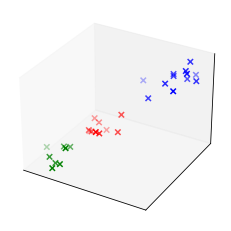

In [364]:
fig5 = plt.figure(figsize=(6,4))
ax = fig5.add_subplot(projection='3d')
ax.scatter(multi_1[:,0], multi_1[:,1], multi_1[:,2], marker='x', s=30, color='green')
ax.scatter(multi_2[:,0], multi_2[:,1], multi_2[:,2], marker='x', s=30, color='red')
ax.scatter(multi_3[:,0], multi_3[:,1], multi_3[:,2], marker='x', s=30, color='blue')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
#ax.text(3,7,9.1,r'$\mathbb{R}^p, \, p \;large$', fontsize=20)
#plt.title(r'$y_i \in \mathbb{R}^p, \, p \;large$', fontsize=20)
fig5.savefig('pres/multi_points_3clusters.pdf',bbox_inches="tight")

In [335]:
np.random.seed(12345)
b_1 = np.random.multivariate_normal([1,-0.7], 0.08*np.eye(2), size=12)
b_2 = np.random.multivariate_normal([3,1], 0.08*np.eye(2), size=12)
b_3 = np.random.multivariate_normal([4,-0.7], 0.08*np.eye(2), size=12)

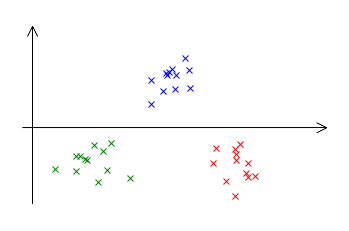

In [350]:
plt.plot(b_1[:,0],b_1[:,1], 'x', color='green')
plt.plot(b_2[:,0],b_2[:,1], 'x', color='blue')
plt.plot(b_3[:,0],b_3[:,1], 'x', color='red')
fig6 = plt.gcf()
fig6.set_facecolor('white') 
ax = plt.gca()
ax.axis('equal')
# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# draw x and y axis
ax.arrow(-0.2, 0, 6, 0., fc='k', ec='k', lw = 0.5, 
             head_width=0.2, head_length=0.2, overhang = 1, 
             length_includes_head= True, clip_on = False) 

ax.arrow(0, -1.5, 0., 3.5, fc='k', ec='k', lw = 0.5, 
             head_width=0.2, head_length=0.2, overhang = 1, 
             length_includes_head= True, clip_on = False)

fig6.savefig('pres/lambda_problem_2d.pdf',bbox_inches="tight")

In [339]:
Lamb=np.array([[0,0,0],[1,1,1]]).T

In [343]:
t_1 = np.array([np.matmul(Lamb,p) for p in b_1])
t_2 = np.array([np.matmul(Lamb,p) for p in b_2])
t_3 = np.array([np.matmul(Lamb,p) for p in b_3])

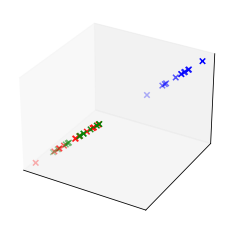

In [352]:
fig7 = plt.figure()
ax = fig7.add_subplot(projection='3d')
ax.scatter(t_1[:,0], t_1[:,1], t_1[:,2], marker='x', s=30, color='green')
ax.scatter(t_2[:,0], t_2[:,1], t_2[:,2], marker='x', s=30, color='blue')
ax.scatter(t_3[:,0], t_3[:,1], t_3[:,2], marker='x', s=30, color='red')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
#ax.text(3,7,9.1,r'$\mathbb{R}^p, \, p \;large$', fontsize=20)
fig7.savefig('pres/lambda_problem_3d.pdf',bbox_inches="tight")